# <font color='blue'>SENG 474 - Assignment 1 (Experiments and Analysis)</font>


Student Name:  Mek Obchey \
Student ID:    V00880355 \
Spring 2020


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# This part is for preprocesssing the data
# Read data, clean it, then split

df = pd.read_csv('./processed.cleveland.data')
df = df.replace('?',np.NaN)
df.apply(pd.to_numeric)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Group labels into two sets {0} = 0 and {1,2,3,4} = 1
y[y > 0] = 1

# replace missing values denoted '?' with the mean of its column 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean', verbose=0)
imputer.fit(X[:])
X[:,:] = imputer.transform(X[:])

# splitting the dataset into the Training set and Test set by 20%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [11]:
# Functions that will be used to calculate train vs test error, and to plot the result

# Calculate train and test errors
def calculate_errors(classifier, parameter, param_range):
    train_errors = list()
    test_errors = list()
    for i in param_range:
        eval('classifier.set_params(' + parameter + '=i)')
        classifier.fit(X_train, y_train)
        train_errors.append(classifier.score(X_train, y_train))
        test_errors.append(classifier.score(X_test, y_test))
    return (train_errors, test_errors)

def graph_train_test_errors(train_errors, test_errors, param, param_range, title):
    ############## Optimal Parameter ############
    i_param_optim = np.argmax(test_errors)
    param_optim = param_range[i_param_optim]
    print("Optimal parameter : %s" % param_optim)
    #############################################
    lw = 2
    plt.plot(param_range, train_errors, label="Train",color="darkorange", lw=lw)
    plt.plot(param_range, test_errors, label="Test",  color="navy", lw=lw)
    plt.vlines(param_optim, plt.ylim()[0], np.max(test_errors), color='k',
               linewidth=3, label='Optimum on test')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Performance Measure' + title)
    plt.xlabel('Number of ' + param.upper())
    plt.ylabel('Performance')
    plt.autoscale()
    plt.show()


# <font color='blue'> Decision Tree (with pruning)</font>

## DT Test 1: Tuning max_features

This part shows the effect of limiting the number of features allowed in two decision trees (Gini vs Entropy)

Optimal parameter : 8


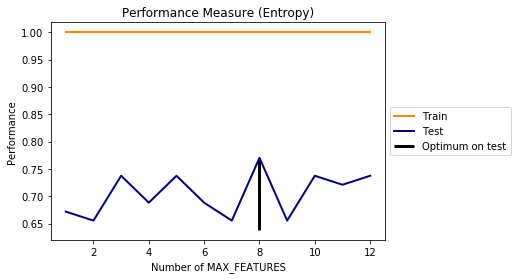

Optimal parameter : 10


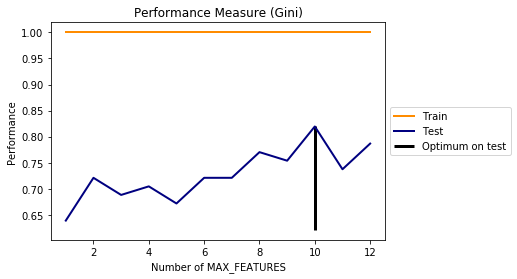

In [19]:
from sklearn.tree import DecisionTreeClassifier

classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
    
# Parameter to test
param = 'max_features'
param_range = np.arange(1, 13, 1)

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()

## DT Test 2: Tuning max_leaf_nodes with a different random_state

Similiar to the above test, the only different is setting the random_state to 1 to see how \
this will affect the performance measure.

Optimal parameter : 5


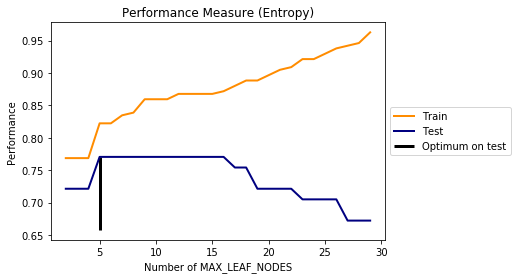

Optimal parameter : 17


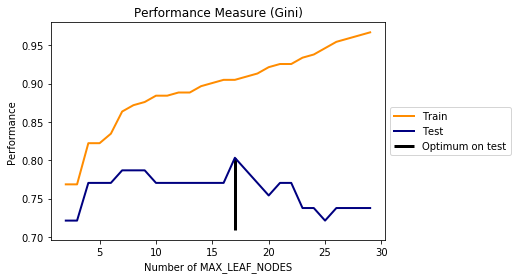

In [18]:
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
    
# Parameter to test
param = 'max_leaf_nodes'
param_range = np.arange(2,30,1)

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()

## DT Test 3: Tuning ccp_alpha (cost-complexity pruning parameter)

This test uses Minimal cost-complexity pruning algorithm, provided by sklearn library, to prune the trees

Optimal parameter : 0.02


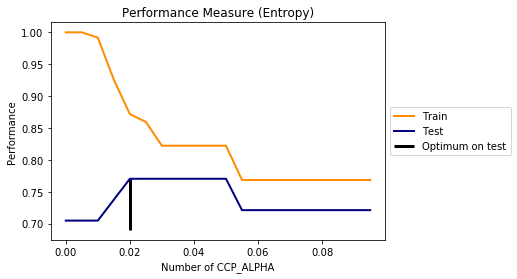

Optimal parameter : 0.01


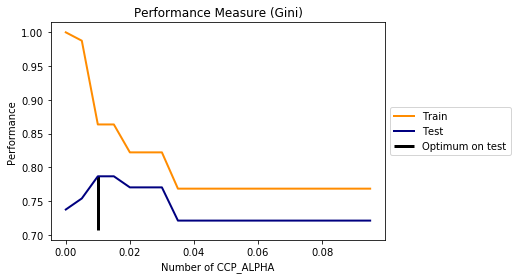

In [17]:
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
    
# Parameter to test
param = 'ccp_alpha'
param_range = np.arange(0, 0.1, 0.005)

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()

# <font color='blue'> Random Forest (no pruning) </font>

## RF Test 1: n_estimators with sqrt(d) split


Optimal parameter : 6


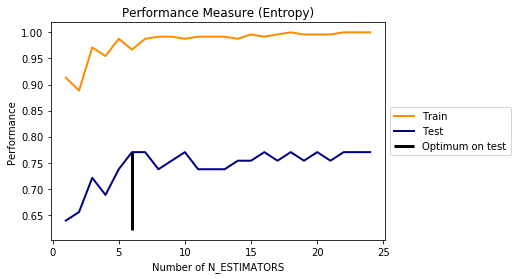

Optimal parameter : 3


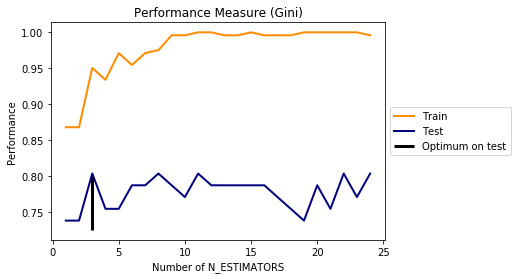

In [16]:
from sklearn.ensemble import RandomForestClassifier


#Question max_features = sqrt(d) is it chosen randomly?
classifier1 = RandomForestClassifier(criterion='entropy', max_features= 'sqrt', random_state=0, n_jobs=2)
classifier2 = RandomForestClassifier(criterion='gini', max_features = 'sqrt', random_state=0, n_jobs=2)

# Parameter to test
param = 'n_estimators'
param_range = np.arange(1, 25, 1)

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()

## RF Test 2: n_estimators with 'd' features split


Optimal parameter : 7


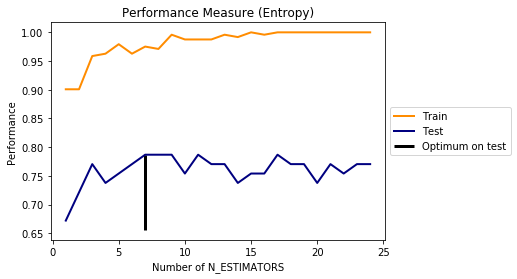

Optimal parameter : 5


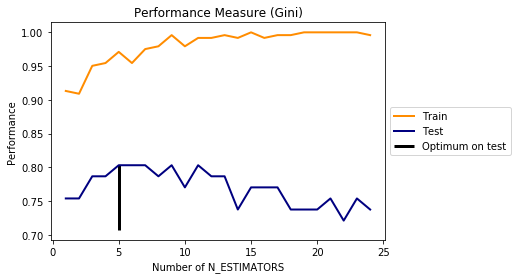

In [20]:
from sklearn.ensemble import RandomForestClassifier


#Question max_features = sqrt(d) is it chosen randomly?
classifier1 = RandomForestClassifier(criterion='entropy', max_features= None, random_state=0, n_jobs=2)
classifier2 = RandomForestClassifier(criterion='gini', max_features = None, random_state=0, n_jobs=2)

# Parameter to test
param = 'n_estimators'
param_range = np.arange(1, 25, 1)

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param, param_range, title=' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param, param_range, title=' (Gini)')

models.clear()

# <font color='blue'> Neural Networks </font>

In [173]:
from tensorflow import keras

#ANN
classifier = keras.Sequential()

# layers: input, 1 hidden, output
classifier.add(keras.layers.Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(keras.layers.Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])

# classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)
# y_pred = classifier.predict(X_test)
# y_pred = (y_pred > 0.5)

## References: 
https://scikit-learn.org
\
https://matplotlib.org/tutorials/intermediate/legend_guide.html
\
\
\
Ploting train error vs test error (by Alexandre Gramfort): \
https://scikit-learn.org/stable/auto_examples/model_selection/plot_train_error_vs_test_error.html